# Image Classification - Brain Tumor.
This notebook aims to detect brain tumors in MRI images.

In [1]:
# Import relevant packages.

import numpy as np
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

### Get data.
Load data and split data in train, val, test datasets.

In [3]:
batch_size = 16
img_height = 256
img_width = 256

train_data_dir = "../data/train"
test_data_dir = "../data/test"

train = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 232 files belonging to 2 classes.
Using 186 files for training.
Found 232 files belonging to 2 classes.
Using 46 files for validation.
Found 21 files belonging to 2 classes.


In [4]:
# Print Class labels.
class_names = train.class_names
print(class_names)

['no', 'yes']


### Visualize sample of images.

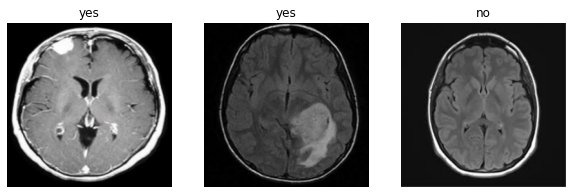

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Apply data augmentation.
Create layers for data augmentations: Flip and Rotation.

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

### Add prefetching and caching.

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

### Define Convolutional Neural Network model.

In [8]:
# Convolutional Neural Network.

input_shape = (256, 256, 3)
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Rescaling(1./255),
    data_augmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes)
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                  

In [11]:
# Compile model.

model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train CNN model.

In [16]:
# Train CNN model on train dataset and validate on val dataset.

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
    train,
    validation_data=val,
    epochs=200,
    callbacks=[callback]
)

Epoch 1/200
12/12 [==============================] - 9s 715ms/step - loss: 0.3784 - accuracy: 0.8495 - val_loss: 0.4935 - val_accuracy: 0.7826
Epoch 2/200
12/12 [==============================] - 9s 744ms/step - loss: 0.3357 - accuracy: 0.8602 - val_loss: 0.5192 - val_accuracy: 0.7826
Epoch 3/200
12/12 [==============================] - 9s 776ms/step - loss: 0.3750 - accuracy: 0.8656 - val_loss: 0.4394 - val_accuracy: 0.7826
Epoch 4/200
12/12 [==============================] - 11s 935ms/step - loss: 0.3650 - accuracy: 0.8602 - val_loss: 0.5827 - val_accuracy: 0.7826
Epoch 5/200
12/12 [==============================] - 11s 933ms/step - loss: 0.3324 - accuracy: 0.8656 - val_loss: 0.4995 - val_accuracy: 0.7826
Epoch 6/200
12/12 [==============================] - 11s 949ms/step - loss: 0.3678 - accuracy: 0.8495 - val_loss: 0.5898 - val_accuracy: 0.7826
Epoch 7/200
12/12 [==============================] - 13s 1s/step - loss: 0.3045 - accuracy: 0.8978 - val_loss: 0.5958 - val_accuracy: 0.782

Epoch 58/200
12/12 [==============================] - 11s 886ms/step - loss: 0.1194 - accuracy: 0.9516 - val_loss: 0.5121 - val_accuracy: 0.8696
Epoch 59/200
12/12 [==============================] - 11s 912ms/step - loss: 0.2147 - accuracy: 0.9409 - val_loss: 0.5183 - val_accuracy: 0.8043
Epoch 60/200
12/12 [==============================] - 11s 942ms/step - loss: 0.1002 - accuracy: 0.9677 - val_loss: 0.5939 - val_accuracy: 0.8261
Epoch 61/200
12/12 [==============================] - 11s 896ms/step - loss: 0.0973 - accuracy: 0.9677 - val_loss: 0.8924 - val_accuracy: 0.7826
Epoch 62/200
12/12 [==============================] - 11s 890ms/step - loss: 0.1103 - accuracy: 0.9570 - val_loss: 0.6425 - val_accuracy: 0.8043
Epoch 63/200
12/12 [==============================] - 11s 879ms/step - loss: 0.1272 - accuracy: 0.9409 - val_loss: 0.3126 - val_accuracy: 0.8696
Epoch 64/200
12/12 [==============================] - 11s 890ms/step - loss: 0.0777 - accuracy: 0.9785 - val_loss: 0.7730 - val_ac

### Visualize training and validation loss.

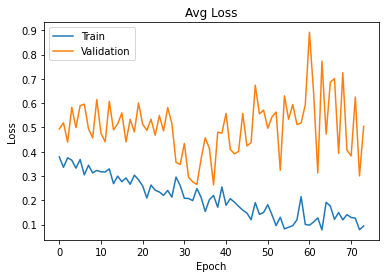

In [17]:
# Loss plot
plt.title('Avg Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.legend()
plt.show()

### Visualize training and validation accuracy.

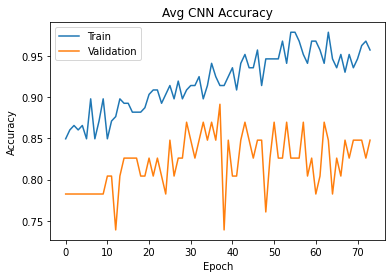

In [18]:
# Score (Accuracy) plot.
plt.title('Avg CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.legend()
plt.show()

### Evaluate model on test dataset.

In [19]:
# Evaluate on test set.

results = model.evaluate(test, batch_size=batch_size)
print(f"Test loss and Test accuracy: {results}")

2/2 [==============================] - 0s 69ms/step - loss: 1.3832 - accuracy: 0.7619
Test loss and Test accuracy: [1.3831968307495117, 0.761904776096344]
